# 기술통계 분석

## 통계 개요

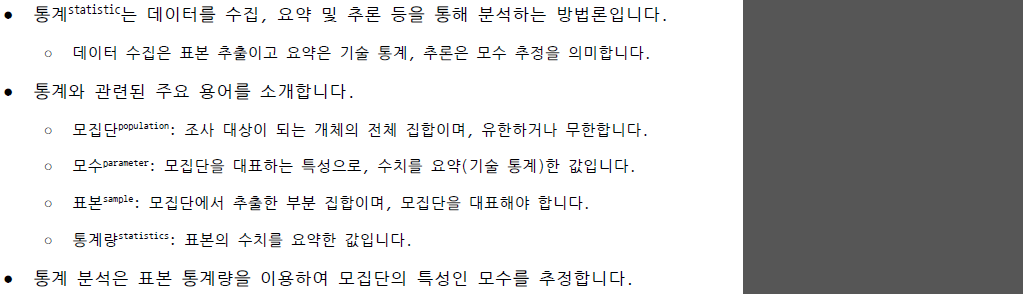

## 기술 통계

## 관련 라이브러리 호출

### ● 관련 라이브러리를 호출합니다

In [1]:
import os
import numpy as np
import pandas as pd
import joblib

In [27]:
import os
import joblib
import numpy as np
import pandas as pd

### ● 실수를 출력할 소수점 자리수를 설정합니다

In [2]:
%precision 3
pd.options.display.precision=3

%precision 3
pd.options.display.precision = 3

### ● statsmodels 라이브러리를 설치합니다

In [ ]:
#!pip install statsmodels

### ● 통계 관련 라이브러리를 호출합니다

In [3]:
from scipy import stats # 절사평균 관련 함수를 포함하는 모듈을 호출합니다.
from statsmodels import robust # 중위수절대편차 관련 함수를 포함하는 모듈을 호출합니다.

## 작업 경로 확인 및 변경

### ● 현재 작업 경로를 확인합니다

In [4]:
os.getcwd()

'D:\\python\\PythonAdvanced-main\\code'

### ● data 폴더로 작업 경로를 변경합니다

In [6]:
os.chdir('../data')

In [7]:
os.getcwd()

'D:\\python\\PythonAdvanced-main\\data'

### ● 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다

In [8]:
os.listdir()

['.ipynb_checkpoints',
 'ex_1.ipynb',
 'ex_2.ipynb',
 'KBO_Hitter_2021.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

## 실습 데이터셋 준비

### ● xlsx 파일을 읽고 데이터프레임 df를 생성합니다

In [9]:
df=pd.read_excel('Used_Cars_Price.xlsx')

In [32]:
df = pd.read_excel(io = 'Used_Cars_Price.xlsx')

### ● df의 열별 자료형을 출력합니다

In [10]:
df.dtypes # MetColor와 Automatic의 자료형이 numpy.int64입니다.(정수가 된다)
# [참고] xlsx 파일로 저장되면서 문자열 '0'과 '1'을 정수로 변환됩니다.

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
dtype: object

### ● z 파일을 읽고 데이터프레임 df를 생성합니다

In [34]:
df = joblib.load(filename = 'Used_Cars_Price.z')

### ● df의 열별 자료형을 출력합니다

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1268 non-null   int64 
 1   Age        1268 non-null   int64 
 2   KM         1268 non-null   int64 
 3   FuelType   1268 non-null   object
 4   HP         1268 non-null   int64 
 5   MetColor   1268 non-null   int64 
 6   Automatic  1268 non-null   int64 
 7   CC         1268 non-null   int64 
 8   Doors      1268 non-null   int64 
 9   Weight     1268 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 99.2+ KB


In [12]:
df.loc[:]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1263,15950,25,25000,Petrol,97,0,0,1400,3,1100
1264,15500,25,49163,Petrol,110,0,1,1600,5,1165
1265,15950,25,29719,Petrol,97,1,0,1400,5,1110
1266,15950,19,51884,Petrol,97,1,0,1400,3,1100


In [35]:
df.dtypes # MetColor와 Automatic의 자료형이 object입니다.(원본 그래도 유지된다)
# [참고] z파일은 Python 객체를 그래도 저장하므로 자료형을 그래도 유지합니다.

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor     object
Automatic    object
CC            int64
Doors         int64
Weight        int64
dtype: object

## 평균

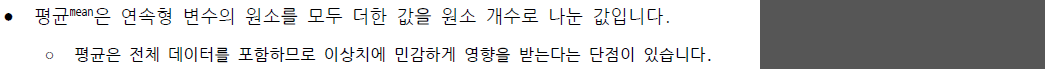

### ● 연속형 변수의 평균을 반환합니다

In [14]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1263,15950,25,25000,Petrol,97,0,0,1400,3,1100
1264,15500,25,49163,Petrol,110,0,1,1600,5,1165
1265,15950,25,29719,Petrol,97,1,0,1400,5,1110
1266,15950,19,51884,Petrol,97,1,0,1400,3,1100


In [15]:
df['Price'].mean()

9696.851

In [36]:
df['Price'].mean()

9696.851

### ● 시리즈에 결측값(NA)이 있으면 mean() 함수는 결측값을 제거한 평균을 반환합니다

In [16]:
nums = pd.Series(data = [1, np.nan, 2]) # 결측값을 포함하는 시리즈를 생성합니다.

In [18]:
data=[1,np.nan,3]

In [20]:
nums100=pd.Series(data)
nums100

0    1.0
1    NaN
2    3.0
dtype: float64

In [21]:
nums.mean()

1.500

In [17]:
nums # nums의 1번 인덱스(두 번째) 원소가 결측값입니다.

0    1.0
1    NaN
2    2.0
dtype: float64

In [39]:
# nums의 평균을 반환합니다.
nums.mean()

1.500

## 절사평균

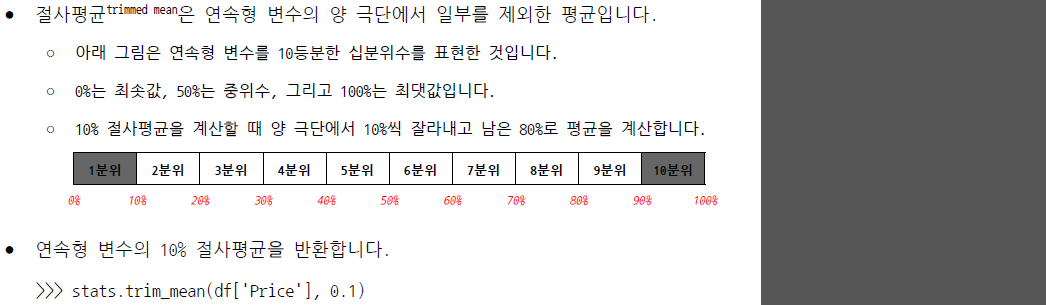

In [23]:
stats.trim_mean(df['Price'],0.1)

9591.892

In [25]:
df['Price'].mean()

9696.851

In [30]:
stats.trim_mean(df['Price'], 0.5)

C:\Program Files\python\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Program Files\python\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

## 중위수

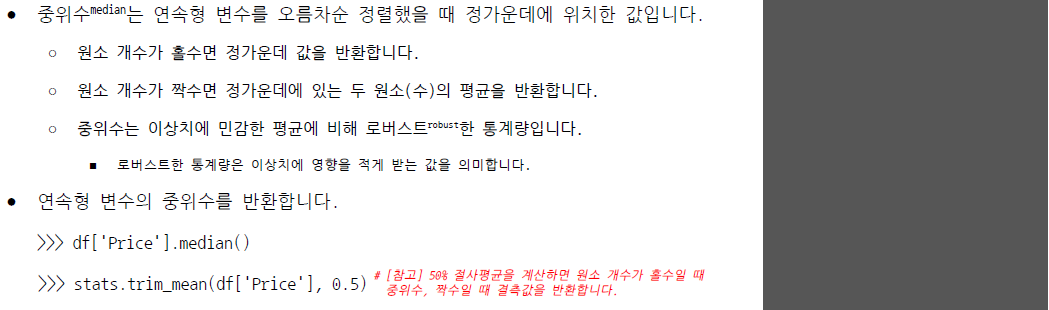

In [29]:
df['Price'].median()

9487.500

## [참고] 우리나라 근로자 연봉 평균 및 중위수(2018년)

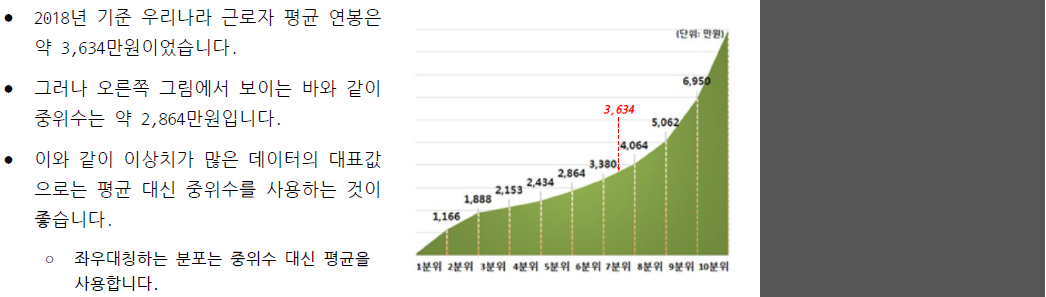

## 분위수와 사분위수

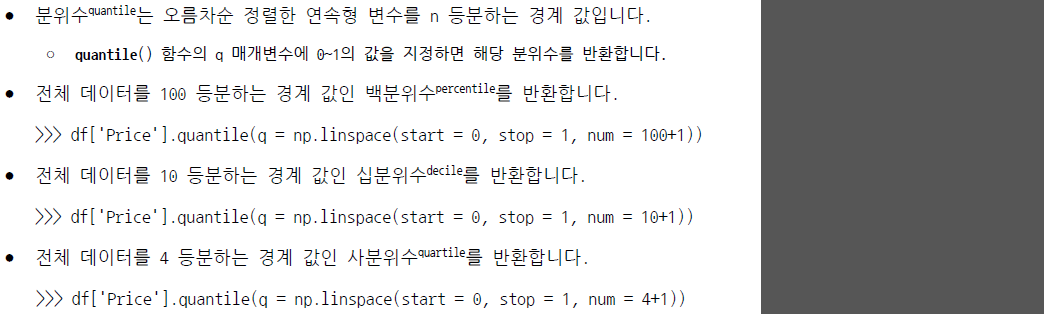

In [33]:
df['Price'].quantile(q=np.linspace(0,1,13))

0.000     4350.000
0.083     7084.583
0.167     7750.000
0.250     8250.000
0.333     8750.000
0.417     8950.000
0.500     9487.500
0.583     9950.000
0.667    10450.000
0.750    10950.000
0.833    11895.000
0.917    12950.000
1.000    15950.000
Name: Price, dtype: float64

## 범위와 사분범위

### ● 범위(range)는 연속형 변수의 최댓값과 최솟값의 간격입니다

In [34]:
df['Price'].max()-df['Price'].min()

11600

In [36]:
df['Price'].quantile(np.linspace(0,1,2))

0.0     4350.0
1.0    15950.0
Name: Price, dtype: float64

In [40]:
df['Price'].quantile(np.linspace(0,1,2)).diff().iloc[-1]

11600.000

In [40]:
df['Price'].max() - df['Price'].min() # 연속형 변수의 범위(최댓값과 최솟값의 간격)를 반환합니다.

11600

In [41]:
df['Price'].quantile(q = [0, 1])

0.0     4350.0
1.0    15950.0
Name: Price, dtype: float64

In [42]:
df['Price'].quantile(q = [0, 1]).diff() # diff() 함수는 원소간 차이를 반환합니다.(최댓값 - 최솟값)

0.0        NaN
1.0    11600.0
Name: Price, dtype: float64

In [43]:
df['Price'].quantile(q = [0, 1]).diff().iloc[-1] #iloc[-1] :마지막 수만 뽑아라

11600.000

### ● 사분범위(interquartile range)는 연속형 변수의 3사분위수와 1사분위수의 간격입니다.

In [43]:
df['Price'].quantile(np.linspace(0.25,0.75,2)).diff().iloc[-1]

2700.000

In [44]:
df['Price'].quantile(q = [0.25, 0.75]).diff().iloc[-1] # 연속형 변수의 사분범위(3사분위수와 1사분위수의 간격)를 반환합니다.

2700.000

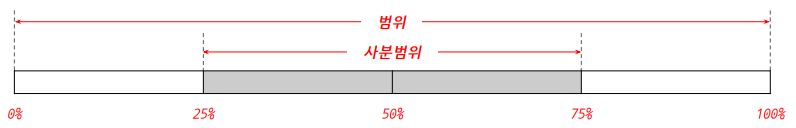

## 최빈값

### ● 최빈값(mode)은 이산형 또는 범주형 변수에서 빈도수가 가장 높은 원소를 의미합니다

In [44]:
df['FuelType'].mode() # FuelType의 최빈값을 반환합니다.

0    Petrol
Name: FuelType, dtype: object

### ● 범주형 변수의 빈도수를 내림차순 정렬한 결과를 반환합니다

In [47]:
df['FuelType'].mode()

0    Petrol
Name: FuelType, dtype: object

In [53]:
df['FuelType'].value_counts(ascending=True)#.sort_index()

CNG         17
Diesel     126
Petrol    1125
Name: FuelType, dtype: int64

In [46]:
df['FuelType'].value_counts()
# [참고] value_counts() 함수의 ascending 매개변수에 전달하는 인수의 기본갑싱 False입니다.

Petrol    1125
Diesel     126
CNG         17
Name: FuelType, dtype: int64

### ● 범주형 변수의 빈도수를 인덱스로 오름차순 정렬한 결과를 반환합니다

In [47]:
df['FuelType'].value_counts().sort_index()

CNG         17
Diesel     126
Petrol    1125
Name: FuelType, dtype: int64

### ● 범주형 변수의 빈도수 대신 상대도수를 내림차순 정렬한 결과를 반환합니다

In [54]:
df['FuelType'].value_counts(normalize = True, ascending=True)

CNG       0.013
Diesel    0.099
Petrol    0.887
Name: FuelType, dtype: float64

## 평균, 분산 및 표준편차의 관계

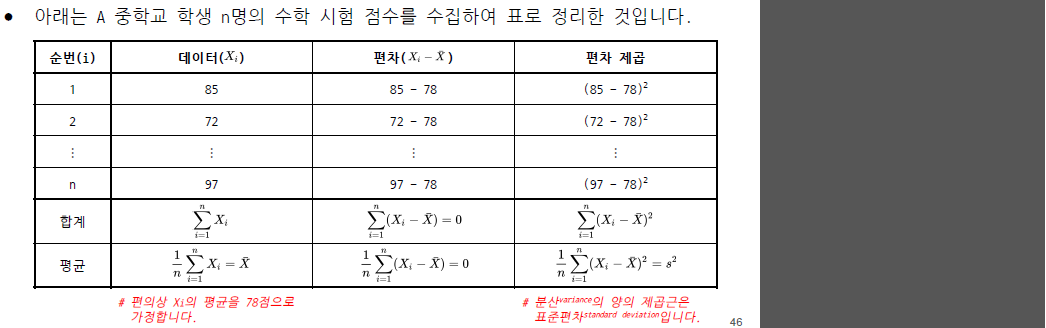

## 분산

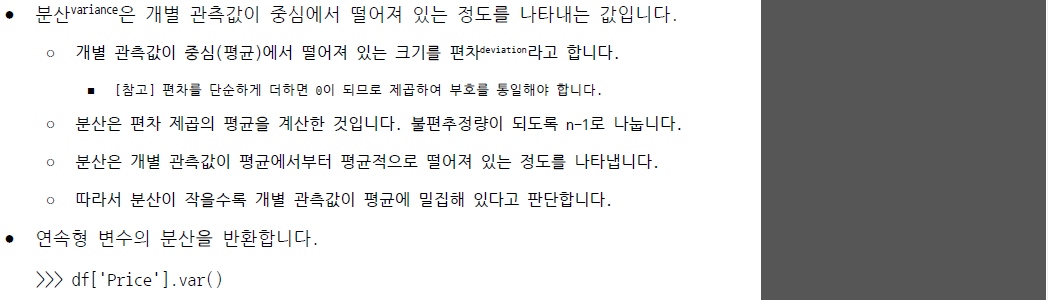

In [56]:
df['Price'].var()

4117236.370

In [57]:
df['Price'].std()

2029.097

## 표준편차

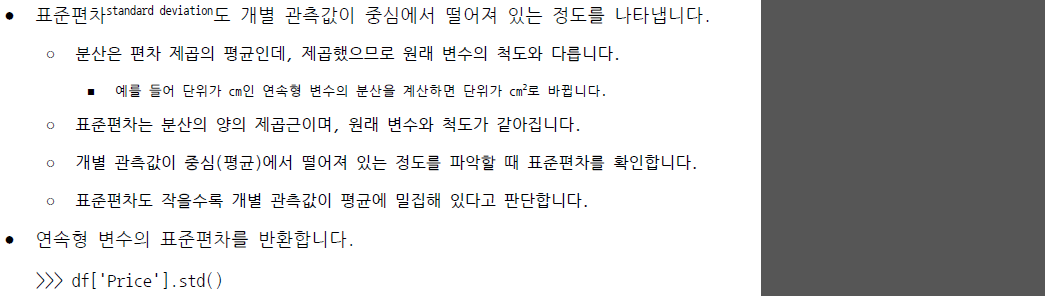

## 중위수절대편차

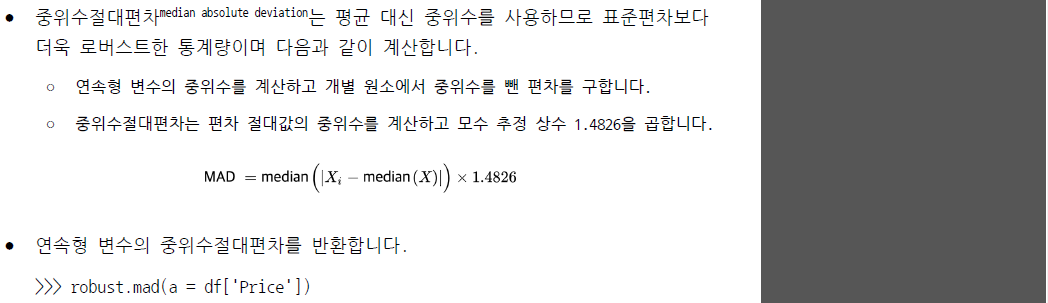

## 여러 열의 기술통계량 확인

### ● 여러 연속형 변수의 평균, 표준편차 및 중위수를 반환합니다

In [59]:
df['Price'].mean()

9696.851

In [61]:
df.mean(numeric_only=True)

Price         9696.851
Age             60.593
KM           73737.629
HP             100.442
MetColor         0.662
Automatic        0.055
CC            1558.816
Doors            4.002
Weight        1061.572
dtype: float64

In [62]:
df.mean(numeric_only=True) # 이렇게 써도 됨

Price         9696.851
Age             60.593
KM           73737.629
HP             100.442
MetColor         0.662
Automatic        0.055
CC            1558.816
Doors            4.002
Weight        1061.572
dtype: float64

In [70]:
df.apply('var',numeric_only=False)

TypeError: could not convert string to float: 'Diesel'

In [50]:
df.apply(func = 'mean', numeric_only = True) # numeric_only는 pd.Series 통계 함수에 정의된 매개변수입니다.
# pandas에서 함수에 따옴표로 감싼 것은 pandas의 방식을 의미
#  - apply() : dataframe에서 열 또는 행별로 반복 실행

Price      9696.851
Age          60.593
KM        73737.629
HP          100.442
CC         1558.816
Doors         4.002
Weight     1061.572
dtype: float64

In [51]:
df.apply(func = 'std', numeric_only = True) # 여러 연속형 변수의 표준편차를 반환합니다.

Price      2029.097
Age          13.709
KM        35858.332
HP           13.100
CC          183.657
Doors         0.949
Weight       33.839
dtype: float64

In [52]:
df.apply(func = 'median', numeric_only = True) # 여러 연속형 변수의 중위수를 반환합니다.

Price      9487.5
Age          63.0
KM        67358.5
HP          110.0
CC         1600.0
Doors         4.0
Weight     1060.0
dtype: float64

### ● 여러 연속형/범주형 변수의 기술통계량을 반환합니다

In [53]:
df.describe() # 연속형 변수의 원소 개수, 평균, 표준편차, 최솟값, 사분위수 및 최댓값을 출력합니다.
# [참고] 표준편차를 계산할 때 분자를 n-1로 나눕니다.

,Price,Age,KM,HP,CC,Doors,Weight
count,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000
mean,9696.851,60.593,73737.629,100.442,1558.816,4.002,1061.572
std,2029.097,13.709,35858.332,13.100,183.657,0.949,33.839
min,4350.000,19.000,5309.000,69.000,1300.000,3.000,1000.000
25%,8250.000,51.000,48950.250,86.000,1400.000,3.000,1035.000
50%,9487.500,63.000,67358.500,110.000,1600.000,4.000,1060.000
75%,10950.000,72.000,90315.000,110.000,1600.000,5.000,1075.000
max,15950.000,80.000,243000.000,116.000,2000.000,5.000,1205.000


In [54]:
df.describe(include = object)
# 범주형 변수의 원소 개수, 중복 제거한 원소의 졸류, 최빈값 및 최빈값의 빈도수를 출력합니다.

,FuelType,MetColor,Automatic
count,1268,1268,1268
unique,3,2,2
top,Petrol,1,0
freq,1125,840,1198


## End of Document